# In this section we will be performing some of the exploratory data analysis to our data

In [96]:
# importing libraries to the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 
#to generate graphs in the same file

In [11]:
#lets import the data first
data=pd.read_csv("cleaned-auto.csv")
#data.head()

data.rename(columns={"Unnamed: 0":"indexes"}, inplace=True)
data.drop(columns=["indexes"], axis=1, inplace=True) #dropped extra column which is unnamed
data.head() #final data we have after cleaning


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower_binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


In [12]:
#lets check the correlation of variables with each other.
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.144324,-0.008153,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.030035,0.055045,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494884,0.158018,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610051,0.123952,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544924,0.188822,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185907,-0.060663,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644617,0.167438,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.582857,0.205928,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.144324,-0.030035,0.494884,0.610051,0.544924,0.185907,0.644617,0.582857,1.000000,-0.055390,0.001250,0.567952,-0.277060,0.570252,0.567318,0.543436,0.054496,-0.054496,-0.228289,0.228289
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.036133,0.047089,0.082269,0.241064,-0.241064,-0.218233,0.218233


In [14]:
#lets check the correlation between some features separately
#horsepower, stroke, bore and compression ratio
data[["horsepower","stroke","bore","compression-ratio","engine-size"]].corr()

,horsepower,stroke,bore,compression-ratio,engine-size
horsepower,1.000000,0.098128,0.567952,-0.214489,0.822668
stroke,0.098128,1.000000,-0.055390,0.187871,0.205928
bore,0.567952,-0.055390,1.000000,0.001250,0.582857
compression-ratio,-0.214489,0.187871,0.001250,1.000000,0.028889
engine-size,0.822668,0.205928,0.582857,0.028889,1.000000


In [17]:
#lets check for horsepower  
data[["horsepower","price"]].corr()

,horsepower,price
horsepower,1.000000,0.809607
price,0.809607,1.000000


(0, 49260.46233358589)

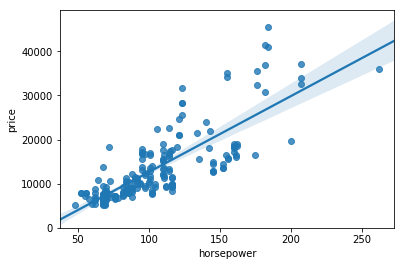

In [18]:
#usine regression plot
sns.regplot(x="horsepower",y="price", data=data)
plt.ylim(0,)

In [16]:
#lets check for engine size  
data[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


C:\Users\Babar kahn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 56636.42702169671)

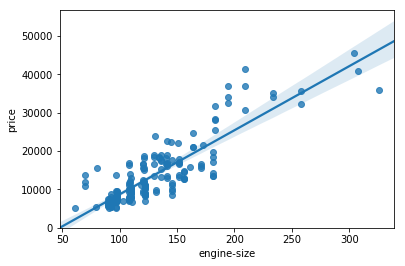

In [15]:
sns.regplot(x="engine-size",y="price", data=data)
plt.ylim(0,)

(0, 47840.92738921037)

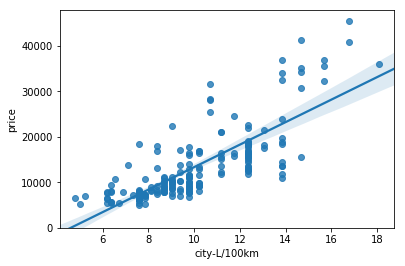

In [20]:
sns.regplot(x="city-L/100km", y="price", data=data)
plt.ylim(0,)

In [19]:
data[["city-L/100km","price"]].corr() #city milage is also a good predictor of price

,city-L/100km,price
city-L/100km,1.000000,0.789898
price,0.789898,1.000000


In [21]:
data[["highway-L/100km","price"]].corr() #highway mpg is also a good predictor of price

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


In [32]:
data[["bore","price"]].corr()

,bore,stroke,price
bore,1.000000,-0.055390,0.543436
stroke,-0.055390,1.000000,0.082269
price,0.543436,0.082269,1.000000


In [22]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-L/100km', 'highway-L/100km', 'price',
       'horsepower_binned', 'fuel-type-diesel', 'fuel-type-gas',
       'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [24]:
#lets check for fuel type now
data[["fuel-type-diesel","fuel-type-gas","price"]].corr()

,fuel-type-diesel,fuel-type-gas,price
fuel-type-diesel,1.000000,-1.000000,0.110326
fuel-type-gas,-1.000000,1.000000,-0.110326
price,0.110326,-0.110326,1.000000


In [25]:
#now we can see that the fuel types have negative correlation that why its not suitable for predicting the price
#lets check for the rpm now
data[["peak-rpm","price"]].corr() 
#this also has a negative correlation but it has a strong negative correlation relationship

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


(0, 47436.148325769056)

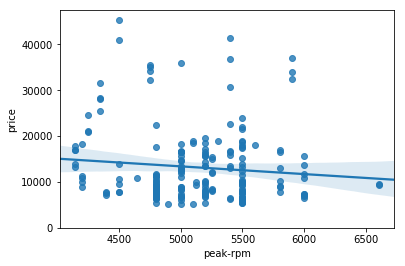

In [26]:
#see how a negative correlation looks in the regression plot
sns.regplot(x="peak-rpm",y="price", data=data)
plt.ylim(0,)

          stroke     price
stroke  1.000000  0.082269
price   0.082269  1.000000


(0, 47436.148325769056)

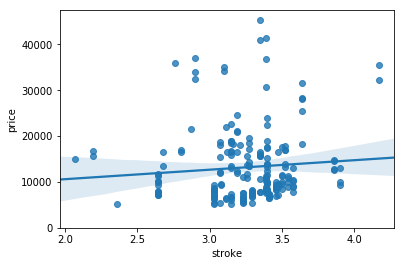

In [29]:
print(data[["stroke","price"]].corr())
#stroke has a weak positive correlation with the price
sns.regplot(x="stroke",y="price", data=data)
plt.ylim(0,)

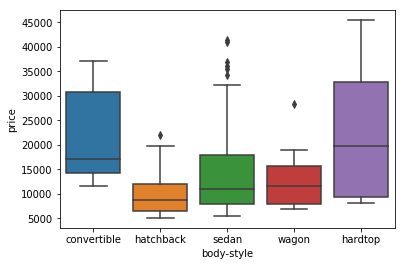

In [33]:
#lets check how price varies with body style
sns.boxplot(x="body-style",y="price", data=data)

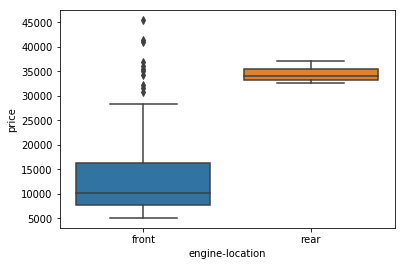

In [35]:
sns.boxplot(x="engine-location",y="price", data=data)

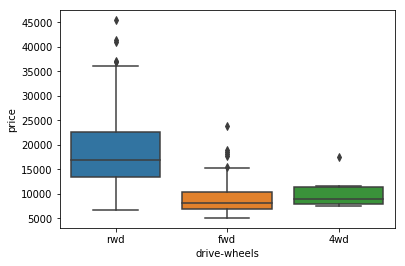

In [36]:
sns.boxplot(x="drive-wheels", y="price", data=data) #good predictor of price under categorical features to predict price

In [41]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256874,10.164279,103.402985,5117.665368,9.944145,8.044957,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,2.534599,1.840739,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
#as we see that the bore column has count of 197 that means that we have some missing values in the bore column lets check 
data["bore"].isnull().sum()
#our bore columns has 4 null values first we will check the value count
data["bore"].value_counts()
#replacing the null values with average bore value
avg_bore=data["bore"].astype("float").mean(axis=0) #axis 0 is for rows and 1 for columns
print(avg_bore)
#replacing the value now in column
data["bore"].replace(np.nan,avg_bore, inplace=True)
data["bore"].isnull().sum() #to cross check the null value
#now we have no missing value in the colums
data.describe()

3.330710659898478


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256874,10.164279,103.402985,5117.665368,9.944145,8.044957,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,2.534599,1.840739,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#Lets check the drive wheel feature values we have as this is the good 
#sns.boxplot(x="drive-wheels",y="price", data=data)
#plt.ylim(0,)
data["drive-wheels"].value_counts()
#convert it to a frame
data["drive-wheels"].value_counts().to_frame()
#making it to a data frame
drive_wheels_count=data["drive-wheels"].value_counts().to_frame()
drive_wheels_count.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_count.index.name="drive-wheels"
drive_wheels_count


,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [58]:
# engine-location as variable
engine_loc_counts = data['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


From the above we got that we have only three cars with rear engine location so we cant train our model with just 3 values so we reject the engine location. Instead of that we can use the drive-wheels to predict the price.

In [68]:
#Now we group the data with new data farme that contain drive-wheels, body-style,price to know the average price of cars under 
#different drive wheel category
data_group_one=data[["drive-wheels","body-style","price"]]
#now the new data frame contains the required columns.
#We can calculate the average price for each of the different categories of drive-wheels type.
data_group_one= data_group_one.groupby(["drive-wheels"], as_index=False).mean()
data_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [ ]:
Now We will group the variabe by body style now by creating second data frame

In [75]:
data_group_two=data[["drive-wheels","body-style","price"]]
data_group_two=data_group_two.groupby(["body-style"],  as_index=False).mean()
data_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [104]:
#lets calculate the correlation between ["Wheel-base","price"].corr()
pearson_coef, p_value = stats.pearsonr(data['wheel-base'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
data[["wheel-base","price"]].corr() #we get the same value because corr() is a default method.

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


In [105]:
#lets calculate the correlation between ["horsepower","price"].corr()
pearson_coef, p_value = stats.pearsonr(data['horsepower'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)
print(data[["horsepower","price"]].corr()) #see the two correlations are same

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P =  8.076488270732955e-20
            horsepower     price
horsepower    1.000000  0.809607
price         0.809607  1.000000


In [106]:
# Calculating Pearson_Coefficient for "length" Vs "Price" and its P-value
pearson_coef,p_value=stats.pearsonr(data["length"],data["price"])
print("The Pearson Correlation Coefficient is",pearson_coef, "with a P-Value of P-",p_value)

The Pearson Correlation Coefficient is 0.690628380448364 with a P-Value of P- 8.016477466159053e-30


In [107]:
# Calculating Pearson_Coefficient for "width" Vs "Price" and its P-value
pearson_coef,p_value=stats.pearsonr(data["width"],data["price"])
print("The Pearson Correlation Coefficient is",pearson_coef, "with a P-Value of P-",p_value)

The Pearson Correlation Coefficient is 0.7512653440522674 with a P-Value of P- 9.200335510481426e-38


In [108]:
# Calculating Pearson_Coefficient for "curb-weight" Vs "Price" and its P-value
pearson_coef,p_value=stats.pearsonr(data["curb-weight"],data["price"])
print("The Pearson Correlation Coefficient is",pearson_coef, "with a P-Value of P-",p_value)

The Pearson Correlation Coefficient is 0.8344145257702846 with a P-Value of P- 2.1895772388936997e-53


In [109]:
# Calculating Pearson_Coefficient for "engine-size" Vs "Price" and its P-value
pearson_coef,p_value=stats.pearsonr(data["engine-size"],data["price"])
print("The Pearson Correlation Coefficient is",pearson_coef, "with a P-Value of P-",p_value)

The Pearson Correlation Coefficient is 0.8723351674455185 with a P-Value of P- 9.265491622197996e-64


In [110]:
# Calculating Pearson_Coefficient for "bore" Vs "Price" and its P-value
pearson_coef,p_value=stats.pearsonr(data["bore"],data["price"])
print("The Pearson Correlation Coefficient is",pearson_coef, "with a P-Value of P-",p_value)

The Pearson Correlation Coefficient is 0.5431537659807731 with a P-Value of P- 8.051208825441229e-17


In [112]:
# Calculating Pearson_Coefficient for "stroke" Vs "Price" and its P-value
pearson_coef,p_value=stats.pearsonr(data["stroke"],data["price"])
print("The Pearson Correlation Coefficient is",pearson_coef, "with a P-Value of P-",p_value)

The Pearson Correlation Coefficient is 0.08226928855325809 with a P-Value of P- 0.2456161248774556


In [114]:
# Calculating Pearson_Coefficient for "city-L/100km" Vs "Price" and its P-value
pearson_coef,p_value=stats.pearsonr(data["city-L/100km"],data["price"])
print("The Pearson Correlation Coefficient is",pearson_coef, "with a P-Value of P-",p_value)

The Pearson Correlation Coefficient is 0.7898975136626942 with a P-Value of P- 3.9031064009399405e-44


In [115]:
# Calculating Pearson_Coefficient for "highway-L/100km" Vs "Price" and its P-value
pearson_coef,p_value=stats.pearsonr(data["highway-L/100km"],data["price"])
print("The Pearson Correlation Coefficient is",pearson_coef, "with a P-Value of P-",p_value)

The Pearson Correlation Coefficient is 0.8011176263981975 with a P-Value of P- 3.0467845810412534e-46


In [1]:
# Calculating Pearson_Coefficient for "highway-L/100km" Vs "Price" and its P-value
pearson_coef,p_value=stats.pearsonr(data["highway-L/100km"],data["price"])
print("The Pearson Correlation Coefficient is",pearson_coef, "with a P-Value of P-",p_value)

NameError: name 'stats' is not defined

In [121]:
# first we create we create a group
gp_one=data[["drive-wheels","price"]]

group_one_test=gp_one.groupby(["drive-wheels"])
group_one_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [123]:
#we will use the get_group method 
#group_one_test.get_group("rwd")["price"]

In [126]:
# to test ANOVA we can use the function 'f_oneway' from the module 'stats' to get the F-test score and P-value.
f_val,p_val = stats.f_oneway(group_one_test.get_group("rwd")["price"],group_one_test.get_group("fwd")["price"],group_one_test.get_group("4wd")["price"])
print("ANOVA results: F=",f_val,",p=",p_val)

ANOVA results: F= 67.95406500780398 ,p= 3.3945443577151245e-23


In [127]:
#rwd and fwd
f_val,p_val = stats.f_oneway(group_one_test.get_group("rwd")["price"],group_one_test.get_group("fwd")["price"])
print("ANOVA results: F=",f_val,",p=",p_val)

ANOVA results: F= 130.55331609591104 ,p= 2.235530635567824e-23


In [128]:
#rwd and 4wd
f_val,p_val = stats.f_oneway(group_one_test.get_group("rwd")["price"],group_one_test.get_group("4wd")["price"])
print("ANOVA results: F=",f_val,",p=",p_val)

ANOVA results: F= 8.580681368924756 ,p= 0.004411492211225333


In [129]:
#fwd and 4wd
f_val,p_val = stats.f_oneway(group_one_test.get_group("fwd")["price"],group_one_test.get_group("4wd")["price"])
print("ANOVA results: F=",f_val,",p=",p_val)

ANOVA results: F= 0.6654657502523033 ,p= 0.41620116697845666
